In [2]:
!pip install --upgrade youtube-dl
!pip install pafy
!pip install youtube-transcript-api
!pip install google-api-python-client

In [3]:
from googleapiclient.discovery import build
from youtube_transcript_api._errors import (
    VideoUnavailable,
    TooManyRequests,
    YouTubeRequestFailed,
    NoTranscriptFound,
    TranscriptsDisabled,
    NotTranslatable,
    TranslationLanguageNotAvailable,
    NoTranscriptAvailable,
    FailedToCreateConsentCookie,
    InvalidVideoId,
)
from google.colab import drive
import os
import numpy as np

In [6]:
#Code from Python Project to Scrape YouTube using YouTube Data API | Analyze and Visualize YouTube data- https://www.youtube.com/watch?v=SwSbnmqk3zY
#Editted by A'nya

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcripts')

# Set your YouTube Data API key
api_key = ''

# Set the channel ID you want to analyze
channel = 'UCuL-hlISON1aZPWrenYqkQA' #distubed example
#channel = 'UC7trU46U_9XPDtMnDbiDPUQ' # restricted example
# channel = 'UCbCmjCuTUZos6Inko4u57UQ' #suitable example
channel = "UCrNnk0wFBnCS1awGjq_ijGQ" #suitable example

# Set up the YouTube API client
api_service_name = "youtube"
api_version = "v3"
youtube = build(api_service_name, api_version, developerKey=api_key)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Code from Python Project to Scrape YouTube using YouTube Data API | Analyze and Visualize YouTube data- https://www.youtube.com/watch?v=SwSbnmqk3zY
#Editted by A'nya to get just video transcripts



# Function to get channel statistics
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(part='snippet,contentDetails,statistics', id=channel_id)
    response = request.execute()
    # Extract relevant data from the API response
    data = dict(playlist=response['items'][0]['contentDetails']['relatedPlaylists']['uploads'])
    return data

# Function to get video IDs from a playlist
def get_videoIds(youtube, playlist_id):
    request = youtube.playlistItems().list(part='contentDetails', playlistId=playlist_id, maxResults=3) #50
    response = request.execute()
    videoIDs = []
    for i in range(len(response['items'])):
        videoIDs.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    # Continue fetching video IDs until there are no more pages
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(part='contentDetails', playlistId=playlist_id, maxResults=50, pageToken=next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                videoIDs.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')

    return videoIDs

In [9]:
#Code by A'nya
playlistURL = get_channel_stats(youtube, channel)['playlist']
videoIds = get_videoIds(youtube, playlistURL)

print("Playlist URL:", playlistURL)

# Get the video IDs from the playlist

print("Number of video IDs:", len(videoIds))
print(videoIds[:10])


Playlist URL: UUrNnk0wFBnCS1awGjq_ijGQ
Number of video IDs: 3500
['69hjrN6edFk', 'LnDn5bA1azE', 'JT_FLVD4i4E', 'LYPCwOnbor0', 'xq3gx-q-VhM', 'U-SCDx-RGMo', '67kF6XggfiI', 'g3ojI8tllCc', 'Qhpgge4pJqc', 'STf0Y51cEEc']


In [11]:
#Code by A'nya and Bianca
from youtube_transcript_api import YouTubeTranscriptApi
 #check if all suitable videos have transcripts

suitableVideoLinks = ['STf0Y51cEEc', 'ziTeTAQhyo4', 'x5RbKDaRkjM', 'GOkYIggSZqM', 'PJ57DuxwBn4', 'JSha_1TOvC0', 'IopViQfSSn0', '0PVebbCBSlk', 'YbvCmKvnwRs', 'lSMjQn3iBng']
suitableTranscripts = []
for video_id in suitableVideoLinks:
    try:
      transcript = YouTubeTranscriptApi.get_transcript(video_id)

      if transcript:
        text_list = [entry['text'] for entry in transcript]
        suitableTranscripts.append(text_list)
        print("https://www.youtube.com/watch?v="+video_id)
    except (
                VideoUnavailable,
                TooManyRequests,
                YouTubeRequestFailed,
                NoTranscriptFound,
                TranscriptsDisabled,
                NotTranslatable,
                TranslationLanguageNotAvailable,
                NoTranscriptAvailable,
                FailedToCreateConsentCookie,
                InvalidVideoId,
                ) as e:
                print("No transcript available for video:", video_id)
print("How many SuitableVideos have transcripts : ",len(suitableTranscripts))

# check if all disturbed videos have transcripts
disturbedVideoLinks= ["neRDZw_T8_w","YdH0zfNtOGc","kS2ZyTWbgNU","QgZGd5ICAHg","gjaMa-kJsLQ", "6XmyctkvWwo", "DVw50_d10kk&t=2519s", 'kLbn61Z4LDI', 'StTrrS1Tl7U', 'H-4nNFl3KWs', 'Z9tKgkEn2uY', 'QCk-Lv1udOY', 'Q27nB6YIstg', 'qwtyEKTGGQ8', 'Np98uiLhW98', 'MRsBTw_1-iE', 'gSvNkmDlKm0', 'Mx92lTYxrJQ', '7JXomLN8YUU', 'aq2Vt7OvQG0', '1kMH0xZUhOs', 'AhqHBTL-lhk', 'w1hPgNRAk-g', 'bV7iBddiDiY', 'k7sPyU_p2vs',"fhVC4yuAEWk","JGGbwCXR3o0","6FlN646PqLY","zcOuLxFo3tU","wlCkeBDeSs0"]
disturbedTranscripts = []
for video_id in disturbedVideoLinks:
    try:
      transcript = YouTubeTranscriptApi.get_transcript(video_id)

      if transcript:
        text_list = [entry['text'] for entry in transcript]
        disturbedTranscripts.append(text_list)
        print("https://www.youtube.com/watch?v="+video_id)
    except (
                VideoUnavailable,
                TooManyRequests,
                YouTubeRequestFailed,
                NoTranscriptFound,
                TranscriptsDisabled,
                NotTranslatable,
                TranslationLanguageNotAvailable,
                NoTranscriptAvailable,
                FailedToCreateConsentCookie,
                InvalidVideoId,
                ) as e:
                print("No transcript available for video:", video_id)
print("How many disturbedVideos have transcripts : ",len(disturbedTranscripts))


https://www.youtube.com/watch?v=STf0Y51cEEc
No transcript available for video: ziTeTAQhyo4
https://www.youtube.com/watch?v=x5RbKDaRkjM
https://www.youtube.com/watch?v=GOkYIggSZqM
No transcript available for video: PJ57DuxwBn4
https://www.youtube.com/watch?v=JSha_1TOvC0
No transcript available for video: IopViQfSSn0
https://www.youtube.com/watch?v=0PVebbCBSlk
https://www.youtube.com/watch?v=YbvCmKvnwRs
https://www.youtube.com/watch?v=lSMjQn3iBng
How many SuitableVideos have transcripts :  7
https://www.youtube.com/watch?v=neRDZw_T8_w
https://www.youtube.com/watch?v=YdH0zfNtOGc
No transcript available for video: kS2ZyTWbgNU
https://www.youtube.com/watch?v=QgZGd5ICAHg
https://www.youtube.com/watch?v=gjaMa-kJsLQ
https://www.youtube.com/watch?v=6XmyctkvWwo
https://www.youtube.com/watch?v=DVw50_d10kk&t=2519s
https://www.youtube.com/watch?v=kLbn61Z4LDI
https://www.youtube.com/watch?v=StTrrS1Tl7U
https://www.youtube.com/watch?v=H-4nNFl3KWs
No transcript available for video: Z9tKgkEn2uY
https:/

In [12]:
#Code by A'nya

print(suitableTranscripts[6])


['♪♪', '[Zap!]\n>> Power Paige!', "Let's zoom \ninto another", 'comic book\nadventure!', '>> Right \nbehind you,', 'Super Why!', '[♪Bright, happy music♪]', '[giggling]\n>> Ha ha ha!', '[clunk!]\n(Both) Gasp! The lights!', '>> Heeellllppp!', '>>The mayor needs help.\nCome on!', '[♪Inspirational music♪]', "Mayor? It's Power Paige, and\nPrincess Presto, what happened?", '>> The power plug fell \nout of the power portal,', "And I can't find it!\n[digital scanning sound]", 'We can use the Super Specs\nto see better in the dark.', 'You can use your\nSuper Specs, too!', '>> The power plug is\nsomewhere in there.', "And it has to match the\npower portal's shape.", 'The portal has a straight line\ndown and then a curved', "line on top. Hmmm...\nThat's an uppercase P!", "Please hurry!\nI don't like the dark.", "♪We've got to find 'P',\nit's the letter we need♪", '♪to get back the power\nso everyone can see♪', "♪'P' has a straight line down\nand a curved line at the top♪", '♪to finish it off.\nEv

In [13]:
#Install Required Libraries
!pip install opencv-python
!pip install pytube
!pip install pytube pyvirtualdisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00


In [14]:
#Code by Andrea
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/')


# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Directory containing subfolders with .mp4 files
video_dir = '/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Videos'
#subfolders = []
#video_files =[]
videoJoin = []

# Process each subfolder in the directory
for subfolder in os.listdir(video_dir):
    subfolder_path = os.path.join(video_dir, subfolder)
    #subfolders.append(subfolder)
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Change the current working directory to the subfolder
        os.chdir(subfolder_path)

        # Process each .mp4 file in the subfolder
        for video_file in os.listdir(subfolder_path):
            i = 0
            if video_file.endswith('.mp4'):
                video_path = os.path.join(subfolder_path, video_file)
                #video_files.append(video_file)
                videoJoin.append([subfolder, video_file])
                # Your processing code for each .mp4 file goes here
                print(f'Processing video: {video_file}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive
Processing video: Cooking Spaghetti _ Mr. Bean Official Cartoon.mp4
Processing video: PBS KIDS Rocks! _ Mathematic Mind Song with Old Crow Medicine Show _ PBS KIDS #Shorts.mp4
Processing video: Peg + Cat | 8 Nights of Hanukkah Song | PBS KIDS #Shorts.mp4
Processing video: "Won't You Be Our Neighbor?” Sing-Along with Mister Rogers, Daniel Tiger, & Donkey Hodie | PBS KIDS.mp4
Processing video: Back%20to%20School%20Cookies.mp4
Processing video: Meekah%20Learns%20to%20Take%20Care%20of%20Animals%20%7C%20Blippi%20Buddies%3A%20Educational%20videos%20for%20kids.mp4
Processing video: How%20to%20Draw%20and%20Colour%20a%20Colourful%20Elephant%20in%20Chalk%20Pastels%20for%20kids.mp4
Processing video: Rocket%20to%20the%20Moon%2FThe%20Birds%20%7C%20WordWorld.mp4
Processing video: Please%20Find%20Mommy%20Rabbit%21%20%7C%20Where%20are%20you%3F%20%7C

In [15]:
videoJoin

[['Suitable', 'Cooking Spaghetti _ Mr. Bean Official Cartoon.mp4'],
 ['Suitable',
  'PBS KIDS Rocks! _ Mathematic Mind Song with Old Crow Medicine Show _ PBS KIDS #Shorts.mp4'],
 ['Suitable', 'Peg + Cat | 8 Nights of Hanukkah Song | PBS KIDS #Shorts.mp4'],
 ['Suitable',
  '"Won\'t You Be Our Neighbor?” Sing-Along with Mister Rogers, Daniel Tiger, & Donkey Hodie | PBS KIDS.mp4'],
 ['Suitable', 'Back%20to%20School%20Cookies.mp4'],
 ['Suitable',
  'Meekah%20Learns%20to%20Take%20Care%20of%20Animals%20%7C%20Blippi%20Buddies%3A%20Educational%20videos%20for%20kids.mp4'],
 ['Suitable',
  'How%20to%20Draw%20and%20Colour%20a%20Colourful%20Elephant%20in%20Chalk%20Pastels%20for%20kids.mp4'],
 ['Suitable', 'Rocket%20to%20the%20Moon%2FThe%20Birds%20%7C%20WordWorld.mp4'],
 ['Suitable',
  'Please%20Find%20Mommy%20Rabbit%21%20%7C%20Where%20are%20you%3F%20%7C%20Baby%20Animal%20Got%20Lost%20%7C%20Pinkfong%20Cartoon%20for%20Kids.mp4'],
 ['Suitable',
  'How%20To%20Draw%20CHASE%20from%20PAW%20PATROL%20with%

In [ ]:
#Code by Andrea and Bianca
from google.colab import drive
import os
import cv2

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Directory containing subfolders with .mp4 files
video_dir = '/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Videos'
output_frames_dir = '/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames'

videoJoin = []
labels = [0, 1]
results = []
"""
# Process each subfolder in the directory
for subfolder in os.listdir(video_dir):
    subfolder_path = os.path.join(video_dir, subfolder)

    # Check if it's a directory and is either 'Suitable' or 'Disturbed'
    if os.path.isdir(subfolder_path) and subfolder in ['Suitable', 'Disturbed']:
        # Change the current working directory to the subfolder
        os.chdir(subfolder_path)

        # Process each .mp4 file in the subfolder
        for video_file in os.listdir(subfolder_path):
            if video_file.endswith('.mp4'):
                video_path = os.path.join(subfolder_path, video_file)
                videoJoin.append([subfolder, video_file])

                # Open the video capture
                capture = cv2.VideoCapture(video_path)

                # Get the frames per second (fps) of the video
                fps = capture.get(cv2.CAP_PROP_FPS)

                # Calculate the frame interval based on the video category
                if subfolder == 'Suitable':
                    frame_interval = int(17 * fps)  # Create frames every 17 seconds
                elif subfolder == 'Disturbed':
                    frame_interval = int(30 * fps)  # Create frames every 30 seconds

                # Initialize frame number
                frame_nr = 0

                while True:
                    # Calculate the target frame number for the current time
                    target_frame = int(frame_nr * frame_interval)

                    # Set the capture position to the target frame
                    capture.set(cv2.CAP_PROP_POS_FRAMES, target_frame)

                    # Read the frame
                    success, frame = capture.read()

                    if success:
                        # Save each frame with a unique name in the correct subdirectory
                        frame_filename = os.path.join(output_frames_dir, subfolder, f'{subfolder}_{video_file}_{frame_nr}.jpg')
                        cv2.imwrite(frame_filename, frame)
                        frame_nr += 1
                        if subfolder == 'Disturbed':
                            results.append([frame_filename, labels[1]])
                        print('Success', frame_filename)
                    else:
                        break

                # Release the video capture
                capture.release()

print('Processing complete.')
"""

In [16]:
#Code by Andrea

import torch
import numpy as np
import torch.utils.data as data
from torchvision import datasets, transforms
from PIL import Image
import os

from google.colab import drive
import cv2

# Mount Google Drive
#drive.mount('/content/drive', force_remount=True)
drive.mount('/content/drive')


# Load the image name
# Think: what is the meaning of the following codes.

suitable_image = []
for i in os.listdir("/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Suitable/"):
    if i.endswith(".jpg"):
        suitable_image.append("/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Suitable/" + i)

disturbed_image = []
for i in os.listdir("/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Disturbed/"):
    if i.endswith(".jpg"):
        disturbed_image.append("/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Disturbed/" + i)

# Think: what is the meaning of the following codes.
# select the first 80% images for training and the rest images for testing in both
train_suitable_image = suitable_image[: int(len(suitable_image) * 0.8)]
test_suitable_image = suitable_image[int(len(suitable_image) * 0.8): ]

train_disturbed_image = disturbed_image[: int(len(disturbed_image) * 0.8)]
test_disturbed_image = disturbed_image[int(len(disturbed_image) * 0.8): ]

# Train set and Test set
train_image = train_suitable_image + train_disturbed_image
train_label = [1] * len(train_suitable_image) + [0] * len(train_disturbed_image)

test_image = test_suitable_image + test_disturbed_image
test_label = [1] * len(test_suitable_image) + [0] * len(test_disturbed_image)

print("suitable #: ",len(suitable_image))
print("disturbed #:  ",len(disturbed_image))
# Dataset class

class YoutubeVideos(data.Dataset):
    def __init__(self, image_path, label, transform):
        self.image_path = image_path
        self.label = label
        self.transform = transform

    def __getitem__(self, index):
        f = Image.open(self.image_path[index]).convert("RGB")
        f = self.transform(f)
        l = torch.from_numpy(np.array(self.label))[index]
        return f, l

    def __len__(self):
        return len(self.image_path)

# Transform

transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        ])

# load training set and test set to Torch dataset
train_dataset_b = YoutubeVideos(train_image, train_label, transform)
test_dataset_b = YoutubeVideos(test_image, test_label, transform)

train_loader_b = torch.utils.data.DataLoader(train_dataset_b, batch_size=16, shuffle=True)
test_loader_b = torch.utils.data.DataLoader(test_dataset_b, batch_size=1, shuffle=False)

# print the number of samples in training set and testing set


print('Training samples #: ', len(train_dataset_b))
print('Test samples #: ', len(test_dataset_b))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
suitable #:  829
disturbed #:   1116
Training samples #:  1555
Test samples #:  390


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 0.4802, Train Accuracy: 78.39%
Epoch [1/10], Test Loss: 0.2821, Test Accuracy: 90.26%
Epoch [2/10], Train Loss: 0.2953, Train Accuracy: 87.65%
Epoch [2/10], Test Loss: 0.1600, Test Accuracy: 95.90%
Epoch [3/10], Train Loss: 0.2394, Train Accuracy: 90.23%
Epoch [3/10], Test Loss: 0.1369, Test Accuracy: 96.15%
Epoch [4/10], Train Loss: 0.1797, Train Accuracy: 92.28%
Epoch [4/10], Test Loss: 0.1126, Test Accuracy: 96.67%
Epoch [5/10], Train Loss: 0.1465, Train Accuracy: 94.21%
Epoch [5/10], Test Loss: 0.1496, Test Accuracy: 93.85%
Epoch [6/10], Train Loss: 0.1240, Train Accuracy: 95.24%
Epoch [6/10], Test Loss: 0.1492, Test Accuracy: 93.59%
Epoch [7/10], Train Loss: 0.0958, Train Accuracy: 95.95%
Epoch [7/10], Test Loss: 0.1063, Test Accuracy: 95.38%
Epoch [8/10], Train Loss: 0.0848, Train Accuracy: 96.59%
Epoch [8/10], Test Loss: 0.1081, Test Accuracy: 94.62%
Epoch [9/10], Train Loss: 0.0727, Train Accuracy: 97.11%
Epoch [9/10], Test Loss: 0.1159, Test Accuracy:

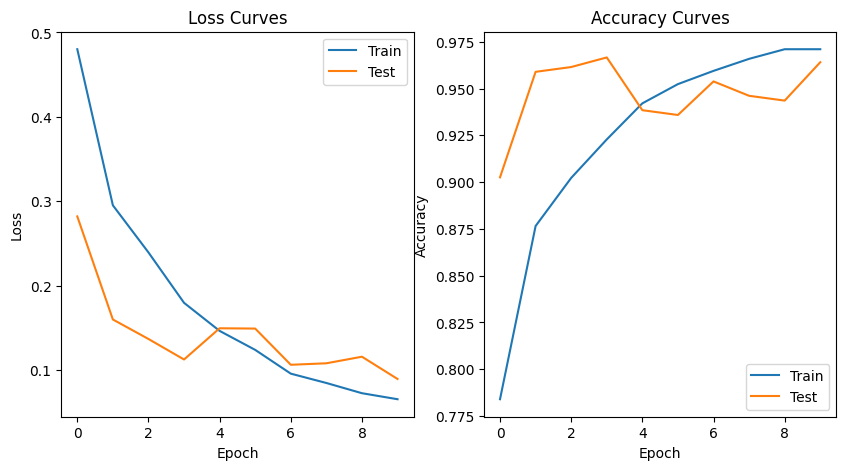

In [21]:
#Code by Andrea

import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import torchvision.models as models

from google.colab import drive
import os
import cv2

# Mount Google Drive
#drive.mount('/content/drive', force_remount=True)


# Assuming you have train_loader_b, test_loader_b, X_val, and y_val defined

# VGG-16
vgg16 = models.vgg16(pretrained=True)
class_num = 2
vgg16.classifier[6] = torch.nn.Linear(vgg16.classifier[6].in_features, class_num)
vgg16 = vgg16.to("cuda")
model = vgg16

# optimizer
sgd_optimizer = optim.SGD(model.parameters(), lr=0.001)

# loss
loss_function = torch.nn.CrossEntropyLoss()

# Data loaders and datasets (replace these with your own loaders and datasets)
train_loader_b = torch.utils.data.DataLoader(train_dataset_b, batch_size=16, shuffle=True)
test_loader_b = torch.utils.data.DataLoader(test_dataset_b, batch_size=1, shuffle=False)
#X_val, y_val =

# train the CNN and draw curves
epoch_num = 10
epoch_train_loss = []
epoch_test_loss = []
epoch_train_accuracy = []
epoch_test_accuracy = []

for epoch in range(epoch_num):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0

    for batch_idx, (image, label) in enumerate(train_loader_b):
        image = image.to("cuda")
        label = label.to("cuda")
        sgd_optimizer.zero_grad()
        output = model(image)
        loss = loss_function(output, label)
        loss.backward()
        sgd_optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total_train += label.size(0)
        correct_train += predicted.eq(label).sum().item()

    epoch_train_loss.append(train_loss / len(train_loader_b))
    epoch_train_accuracy.append(correct_train / total_train)

    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for batch_idx, (image, label) in enumerate(test_loader_b):
            image = image.to("cuda")
            label = label.to("cuda")
            output = model(image)
            loss = loss_function(output, label)

            test_loss += loss.item()
            _, predicted = output.max(1)
            total_test += label.size(0)
            correct_test += predicted.eq(label).sum().item()

    epoch_test_loss.append(test_loss / len(test_loader_b))
    epoch_test_accuracy.append(correct_test / total_test)

    print(f'Epoch [{epoch + 1}/{epoch_num}], Train Loss: {epoch_train_loss[-1]:.4f}, Train Accuracy: {epoch_train_accuracy[-1]*100:.2f}%')
    print(f'Epoch [{epoch + 1}/{epoch_num}], Test Loss: {epoch_test_loss[-1]:.4f}, Test Accuracy: {epoch_test_accuracy[-1]*100:.2f}%')

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_train_loss, label='Train')
plt.plot(epoch_test_loss, label='Test')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_train_accuracy, label='Train')
plt.plot(epoch_test_accuracy, label='Test')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
#Code by Andrea

from torchsummary import summary

summary(vgg16, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

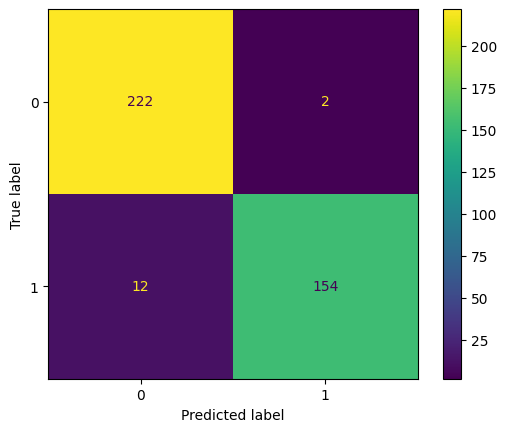

In [23]:
# predict results for test images:

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from PIL import Image

train_dataset_b = YoutubeVideos(train_image, train_label, transform)
test_dataset_b = YoutubeVideos(test_image, test_label, transform)

train_loader_b = torch.utils.data.DataLoader(train_dataset_b, batch_size=16, shuffle=True)
test_loader_b = torch.utils.data.DataLoader(test_dataset_b, batch_size=1, shuffle=False)
y_test = []


y_test_predict = []

model.eval()
for image, label in test_loader_b:
    image = image.to("cuda")
    label = label.to("cuda")
    y = model(image).detach().cpu().numpy()[0]
    y_predict = np.argmax(y)
    y_test_predict.append(y_predict)
    y_test.append(label.cpu().numpy()[0])


print(y_test_predict)
print(y_test)

cm = confusion_matrix(y_test, y_test_predict)
print(cm)

e =ConfusionMatrixDisplay(cm).plot()

print("acc: ", accuracy_score(y_test, y_test_predict))



In [24]:
!pip install huggingface
!pip install -U sentence-transformers
!pip install torch
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=b18976ac878c30a16dad99a8740a0a861f84540d0c8d3c0871a582d3f7ed14c6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [25]:
from sentence_transformers import SentenceTransformer, util
from google.colab import drive
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

.gitattributes:   0%|          | 0.00/737 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#Code by Bianca
"""
#grabs top three scores and their psoition in the array. We canuse this to give us the word
#disturbed_top_scores, disturbed_top_positions = disturbedScores[0].topk(3)
disturbed_top_scores, disturbed_top_positions = torch.topk(disturbedScores.reshape(disturbedScores.shape[0],), 11)
print(disturbed_top_scores)
print(disturbed_top_positions)
for e in disturbed_top_positions:
  print(disturbedKeywordsList[e])

def weightedAverage(disturbed_top_scores):
    global wAverages
    disturbed_top_scores = np.array(disturbed_top_scores)
    weights = [1.0 - i/(len(disturbed_top_scores) - 1) for i in range(len(disturbed_top_scores))]
    normalized_weights = [weight / sum(weights) for weight in weights]
    #print('Normalized weights', normalized_weights)
    wAverages = sum(disturbed_top_scores * normalized_weights)/ sum(normalized_weights)
    return wAverages

if weightedAverage(disturbed_top_scores) > 0.20:
  label = 1
else:
  label = 0


training = (label, transcriptExample)
print("\n ***** Labeling Result", training[0], wAverages, training[1], "\n Type:", type(training))
"""

In [41]:
#Code by Bianca

import os
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

drive.mount('/content/drive')
# Set the transcript folder
transcriptFolder = '/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcripts'
os.chdir(transcriptFolder)
results = []

# Step 1: Process each subfolder in the directory
transcriptJoin = []
labels = [0, 1]

for subfolder in os.listdir(transcriptFolder):
    subfolder_path = os.path.join(transcriptFolder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Change the current working directory to the subfolder
        os.chdir(subfolder_path)

        # Process each .txt file in the subfolder
        for transcript_file in os.listdir(subfolder_path):
            if transcript_file.endswith('.txt'):
                transcript_path = os.path.join(subfolder_path, transcript_file)
                transcriptJoin.append([subfolder, transcript_file])

                # Read the transcript file and do further processing if needed
               # Read the transcript file
                with open(transcript_path, 'r') as f:
                    transcript_text = f.read()

                # Remove RTF tags and words within square brackets
                transcript_text = re.sub(r'\\[a-z]+\d*', '', transcript_text)  # Remove RTF tags
                transcript_text = re.sub(r'\[.*?\]', '', transcript_text)  # Remove words within square brackets
                transcript_text = transcript_text.replace('\'', '')

                # Assuming 'Disturbed' is 1 and others are 0
                label = 1 if subfolder == 'Disturbed' else 0

                # Append the label to the results
                results.append([transcript_text, label])

# Combine data and labels
all_transcripts = [result[0] for result in results]
all_labels = [result[1] for result in results]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_transcripts)

# Vocabulary Building
vocab_size = len(tokenizer.word_index) + 1

# Text to Sequence Conversion
sequences = tokenizer.texts_to_sequences(all_transcripts)

# Padding Sequences
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
labels = np.array(all_labels)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define your vocabulary size, embedding dimension, max length, etc.
vocab_size = 10000
embedding_dim = 100
max_length = 100

model = Sequential()

# Use Embedding layer with trainable weights
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, trainable=True))

# Add an LSTM layer with dropout for regularization
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.5))
#model.add(BatchNormalization()

# Add another LSTM layer
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.5))
#model.add(BatchNormalization())

# Add another LSTM layer
model.add(LSTM(units=32))
model.add(Dropout(0.5))
#model.add(BatchNormalization())

# Add a Dense layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
predictions = model.predict(X_test)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 0.6968 - accuracy: 0.3714 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 2/100
2/2 [==============================] - 0s 323ms/step - loss: 0.6891 - accuracy: 0.6857 - val_loss: 0.6889 - val_accuracy: 0.5500
Epoch 3/100
2/2 [==============================] - 1s 327ms/step - loss: 0.6915 - accuracy: 0.5429 - val_loss: 0.6854 - val_accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 0s 283ms/step - loss: 0.6834 - accuracy: 0.5714 - val_loss: 0.6816 - val_accuracy: 0.6250
Epoch 5/100
2/2 [==============================] - 1s 410ms/step - loss: 0.6795 - accuracy: 0.6571 - val_loss: 0.6780 - val_accuracy: 0.6250
Epoch 6/100
2/2 [==============================] - 1s 283ms/step - loss: 0.6830 - accuracy: 0.5714 - val_loss: 0.6750 - val_accuracy: 0.7750
Epoch 7/100
2/2 [===========

1/1 [==============================] - 0s 24ms/step
[0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
[[12  0]
 [ 3 10]]
1.0
0.7692307692307693
Overall Accuracy: 0.88
Classification Report:
                 precision    recall  f1-score   support

Class disturbed       0.80      1.00      0.89        12
 Class suitable       1.00      0.77      0.87        13

       accuracy                           0.88        25
      macro avg       0.90      0.88      0.88        25
   weighted avg       0.90      0.88      0.88        25



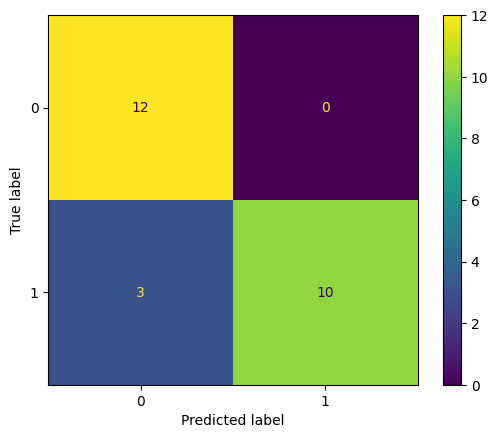

In [42]:
#Code by A'nya
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import f1_score


X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(padded_sequences, labels, test_size=0.5, random_state=42)

predictions = model.predict(X_test)

#print(predictions)
print(y_test)
threshold = .5
predictions = (predictions >= threshold).astype(int)

print(predictions)
cm = confusion_matrix(y_test, predictions)
print(cm)

e =ConfusionMatrixDisplay(cm).plot()

print(cm[0][0]/np.sum(cm[0]))

print(cm[1][1]/np.sum(cm[1]))

overall_accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
print("Overall Accuracy:", overall_accuracy)

classification_rep = classification_report(y_test, predictions, target_names=['Class disturbed', 'Class suitable'])
print("Classification Report:")
print(classification_rep)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          117248    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [36]:
#Code by Bianca

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Example text data
texts = ["all right what's going on guys it's Jeff",
'and we are at the cuss of unlocking the',
'most difficult Mastery camo to get in',
'the entire game bioluminescent camo as',
'you can see here we currently have 50 of',
'51 arachn camo challenges complete the',
'final one that we need to do here is for',
'the riot shield all we have to do is get',
'10 special or Elite zombie kills with',
"the riot shield just like we've done",
"with all other 50 weapons and then we're",
"good we got all the Mastery cam I've",
'also discovered the new meta where you',
"have three primaries I've actually",
'decided to take something out of',
"Blackbeard's book from Rainbow 6 and",
'decided to attach my ride Shield to my',
"weapon so if you're enjoying these",
'Modern Warfare 3 videos leave a like on',
'this video I believe that GUI actually',
'comes out in a couple days on Mortal',
'Kombat also let me know if you want some',
'more Mortal Kombat or anything like that',
"now that I'm done with this I finished a",
'couple more days later than I was',
'expecting to I was hoping to be able to',
'unlock this camo by the time war zone',
"came out I'm a couple days late but",
"that's fine it still lined up really",
'well I ended up unlocking all of the',
'camos within a month of release I',
"honestly didn't expect myself to be able",
'to do that that quick some people',
'completed it in 3 weeks 2 and a half',
'weeks right so the last zombie video',
'that I did I was sitting here talking',
'about and struggling by the way talking',
'about oh you got to go to tier two and',
'you got to get this pack and then you',
'got to get this tool and you got to make',
"sure that you're strong enough to go and",
'do this tier 2 xfill no it turns out',
'that if you go to a tier one xfill that',
'also spawns special zombies now not',
'nearly as many but it does spawn special',
'zombies the plan now is to basically',

'spawn in pop all of our stuff jug',
'stamina going put this on now I only',
'have this weapon right here just in case',
"there's like any kind of difficulty with",
"the uh Shield of Ajax but I won't have",
'any I should be able to just basically',
'one two maybe even three tap the elites',
'the one issue here is you might notice',
"uh I don't have a backpack I have a",
'small ruck sack and I only have one',
"plate so that's why I'm a little scared",
'and it might be a little bit more',
"difficult than it should be because I'm",
'definitely going to be in melee range',
'trying to hit things and I only got one',
'plate I dced yesterday on my last game',
"and uh yeah I just whatever I didn't",
'care enough to go and try to get my [\xa0__\xa0]',
"back so we're one-shotting all the other",
'zombies I imagine that this is going to',
'be a lot better than like say the MW2',
"like combat knife for example I don't",
'know why the MW2 melee weapons do so',
'little damage in comparison to say the',
'MW3 melee the MW3 knife does more damage',
"than the MW2 knife I don't get all right",
"we got this xfill over here I don't",
'personally really like this xfill that',
"much but it's closer so we're just going",
'to head right there and we should be',
'able to go and have bioluminescent',
'within 10 15 minutes so on average if',
'you need special zombie kills it would',
'take you about 10 to 15 minutes per',
'weapon sometimes you only get like two',
'spawns per thing sometimes you get like',
"five also there's a reduced amount of",
'time in between all of the xfill calls',
'now again you can do an xfill like every',
'30 40 seconds maybe a minute or so nice',
'thing is that you could go here right in',
'the beginning of the game even though',
"you don't know where they're spawned at",
'you basically wait a minute or two see',
'where they spawn it and just go right',
'over there back to the complete',

'mindlessness in terms of just this',
"challenge anyway there's one already",
"let's swap to this and see how much",
'damage it does it takes three hits to',
"destroy them oh there's another one 1 2",
"three he's dead there's a third one over",
"here hasn't even even landed yet and",
'they usually spawn during the countdown',
"1 2 3 that's three of them already then",
'we just use this to go and clean all of',
"them up so we don't have to worry about",
'taking too much damage usually during',
"the countdown there's a lot more that",
"yeah there's another one I just heard it",
'so four of them spawned at least on this',
'one I wonder how many hits it would take',
"if I didn't put anything on the riot",
'shield we got four in that one spawn we',
'go and look over when this heavy Chopper',
'despawns once it pops okay boom so it',
"disappeared at 4027 I'm going to assume",
'the next thing will pop at least like',
"3940 or so don't even have to wait long",
'before was brutal they reduced it all',
'the way down to like basically no',
'zombies huge 2-minute gap in between',
'each and every single one I personally',
"wouldn't use this for like leveling or",
"anything like that it's definitely not",
'back to what it used to be but in terms',
'of special spawns dude that took less',
'than 30 seconds what the [\xa0__\xa0] that came',
'back before the 27 seconds were done',
'also definitely Kill the Zombies while',
"you're here waiting for it because the",
'more zombies that you kill the more',
'likely it is that a special will end up',
'spawning off of it the game kind of',
'seems like it ends up picking in a hat',
'every single time a zombie dies the more',
'zombies you kill the more likely it is',
'that a special wolf SP got five specials',
'dead five more and we already got',
"bioluminescence after I'm done with this",
"I don't even know what I'm going to do I",
"honestly can't wait to try to get back",

"on some Mortal Kombat I'm going to",
'regret that really quickly I can tell oh',
"there's another one two spawns you",
'usually get at least two of them so we',
'got like six or seven right there and',
"the nice thing is since you're at the",
"xfill as soon as you're done you just",
"leave I've had some of the most perfect",
"timing things where I've ended up having",
'the camo pop up as the thing was just',
'about to take off in a second and I can',
"just hop in and I'm already out as",
'opposed to the other ways where you know',
'you got to worry about all of the equ',
'that you get all the power ups and stuff',
'you got to fight over the contracts you',
"got to fight for your life if you're",
'fighting in tier two especially if you',
"only got one plate I mean I'm not going",
"to survive in tier 2 anyway and it's",
'back already again we call again all',
'right we got another one right here boom',
"boom boom boom Oh that's took four I",
'think it depends if I end up breaking',
'his arm thing because then his armor',
'comes flying off come here buddy boom',
'boom boom seven or eight now only need a',
'couple more next xville we can be all',
'done all right easy ass camo grind I',
"wouldn't say that this whole camo grind",
'is as smooth as like the MW2 one but I',
'would say that the challenges are',
'probably even easier really makes you',
"wonder what they're going to do with the",
"uh Treyarch game oh also there's some",
'rumors going around that uh verdansk is',
'going to come back at the end of 2024',
'with the uh new war zone [\xa0__\xa0] uh and',
"people are excited but honestly I'm kind",
'of excited for people to like get the OG',
'[\xa0__\xa0] back and then be reminded of how',
'[\xa0__\xa0] it actually is you guys know how I',
"feel about verdansk but I'll happily",
'make videos on this [\xa0__\xa0] and people are',
'that homesick over that [\xa0__\xa0] ass map too',
"I hope you want it back I'm spectating",

"again I'll have fun watching you play it",
"cuz I'm that map is complete [\xa0__\xa0] and",
"also if it's the OG OG ver Dan so you're",
"telling me we're not even going to have",
"like the open Stadium or anything it's",
'just actual OG people are like dude',
"They're copying fortnite no [\xa0__\xa0] they've",
'been copying fortnite the entire time',
'every game has copied fortnite For',
'Better or Worse the gaming industry',
'overall is worse off because of fortnite',
'because of the amount of money that was',
'injected into this [\xa0__\xa0] battle passes',
'and all that [\xa0__\xa0] it things definitely',
'got worse in a sense in terms of the',
'amount of money and other [\xa0__\xa0] that was',
'coming in not to say that I would rather',
'loot boxes or something like that but',
"it's a little bit deeper than that",
'industry just had way more money just',
"pumped into it that's either 9 or 10",
'that might be the last',
"one it is araa hold on wait I'm getting",
'on bioluminescent there it is and then',
"we go and get on and then we're leaving",
'we did that [\xa0__\xa0] in less than 12 minutes',
"there's bioluminescent it's done all",
'three Mastery camos complete we did 36',
'weapons in multiplayer 36 weapons in',
'zombies then we did 51 MW2 weapons and',
'zombie basically did like 110 120',
'weapons total all of the camos and [\xa0__\xa0]',
"and that's not even all of the camo is",
"done there's like 70 something total MW2",
"weapons but I'm good off zombies now I'm",
"done with zombies I'm playing it for a",
"couple weeks I'm good boom there it is",
'bioluminescent boom we got Interstellar',
'right there unlockable you can see it',
'unlock we can go over to the zombies',
'Mastery camo for the MW3 weapons we got',
'Borealis right here all good you can',
'select that as well this is still',
'probably the best camo in the game but',
'the most difficult camo to get in the',
'game is this one right here',

'bioluminescent we can go in the firing',
'range with it right this is the razor',
"back in Spec so I don't even know how",
'good it is but I mean',
'this [\xa0__\xa0] is beautiful look at this a',
'lot of people have Interstellar unlocked',
'a good amount of people have Borealis',
'the smallest amount of people have this',
"one so I'm pretty happy for it I'm proud",
"of it next up I I don't know what grind",
"I'm going to do next obviously I mean we",
"got the UFC event tonight you know I'm",
'going to chill probably for the rest of',
'the night maybe play some Mortal Kombat',
"see what's up next thing that I could",
'potentially do is go and get the MW3',
'weapons uh Mastery charm I guess we go',
'over here to the uh Longbow we go over',
'to weapon mastery for uh multiplayer we',
'could get 100 kills with gilded and 200',
'kills with Forge 300 kills with',
'Priceless 400 kills with Interstellar',
'and then we end up unlocking this little',
'Longbow charm over on the side once you',
'go and unlock all 37 of those which is',
'actually a bit easier than the uh other',
'grind that we did on MW2 you end up',
'unlocking the grand Mastery charm for',
'the MW3 weapons the thing is I already',
'have the MW2 Mastery charm right here',
'for all of the MW2 weapon now there is a',
'zombies Mastery charm as well but it',
'just looks so bad and people already',
"didn't care about me unlocking this [\xa0__\xa0]",
'to begin with that was just something to',
'do hold on I got to bring up my Google',
'doc here boom boom still not completely',
"done I mean it's 66.6% and technically",
"it's even lower than that because they",
'added new weapons so but we got bio this',
'camo is way better after the update I',
'mean all of them are way better but this',
'one in particular is much better than it',
"used to be it's still not the best but",
"it it's definitely up there it can now",
"compete there's some really dark spots",

'over here on meat oh yeah oh this [\xa0__\xa0]',
'is bright already oh yeah I love this',
'camo ho oh and then when I put the 60 on',
'it ends up changing way that this looks',
"there's a dark corner right here which",
'looks crazy got this corner right here',
'which is also pretty dark look how good',
'this camo looks now holy [\xa0__\xa0] yeah all',
'right I got to see the sniper rifles now',
"I'm definitely the most proud of this",
'one this is the one that people did not',
'want to go for a lot of people were like',
"I don't really know about doing that but",
'now that I got it I mean take a look so',
"yeah uh that's all of the Mastery camos",
'I know that I was still making you know',
'Mastery camo unlock videos weeks after',
'people had already gotten them and',
'everything but I was just documenting my',
'journey thank you guys so much for all',
'the love and support on all of these',
'videos so far let me know what you guys',
'want next down in the comment section',
"and uh yeah it's been Jeb guys",
'later']

# Step 1: Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Step 2: Vocabulary Building
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token
print("Vocabulary Size:", vocab_size)

# Step 3: Text to Sequence Conversion
sequences = tokenizer.texts_to_sequences(texts)
print("Text Sequences:", sequences)

# Step 4: Padding Sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
print("Padded Sequences:\n", padded_sequences)


Vocabulary Size: 545
Text Sequences: [[15, 21, 192, 30, 22, 95, 34, 280], [4, 13, 79, 58, 1, 281, 6, 96, 1], [119, 151, 45, 31, 2, 28, 14], [1, 193, 65, 80, 31, 51], [8, 52, 81, 23, 13, 282, 26, 194, 6], [195, 283, 31, 196, 120, 1], [284, 17, 5, 13, 152, 2, 46, 23, 12, 29], [1, 153, 97, 15, 13, 26, 2, 46, 12, 28], [121, 69, 39, 285, 98, 82, 33], [1, 153, 97, 24, 18, 286, 53], [33, 15, 99, 194, 47, 4, 54, 100], [70, 13, 16, 15, 1, 45, 287, 122], [66, 288, 1, 154, 289, 101, 8], [26, 83, 290, 122, 123], [197, 2, 102, 124, 103, 6], [291, 292, 293, 294, 198, 4], [197, 2, 295, 84, 296, 97, 2, 84], [104, 20, 59, 71, 297, 199], [298, 299, 155, 125, 200, 11, 18, 22], [9, 201, 3, 300, 5, 301, 123], [202, 103, 14, 11, 105, 156, 22, 126], [127, 66, 203, 128, 35, 59, 8, 129, 72], [40, 126, 127, 39, 130, 18, 5], [41, 5, 19, 53, 33, 9, 3, 302, 11], [105, 40, 156, 204, 55, 3, 56], [303, 2, 3, 56, 304, 2, 36, 131, 2], [132, 9, 31, 205, 1, 133, 206, 207], [208, 103, 19, 11, 105, 156, 305, 25], [73, 306,

In [37]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.6 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-fgu5ihp_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-fgu5ihp_
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=dbc0d9592e668aa1ac3d16776ccdfda275c35fc95409a6904e4f2a9abb25f32f
  Stored in directory: /tmp/pip-ephem-wheel-cache-g3d1lt6b/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [38]:
#Code by CLIP github -https://github.com/openai/CLIP
import numpy as np
import torch
from pkg_resources import packaging
import clip

clip.available_models()

model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)


100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 59.1MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


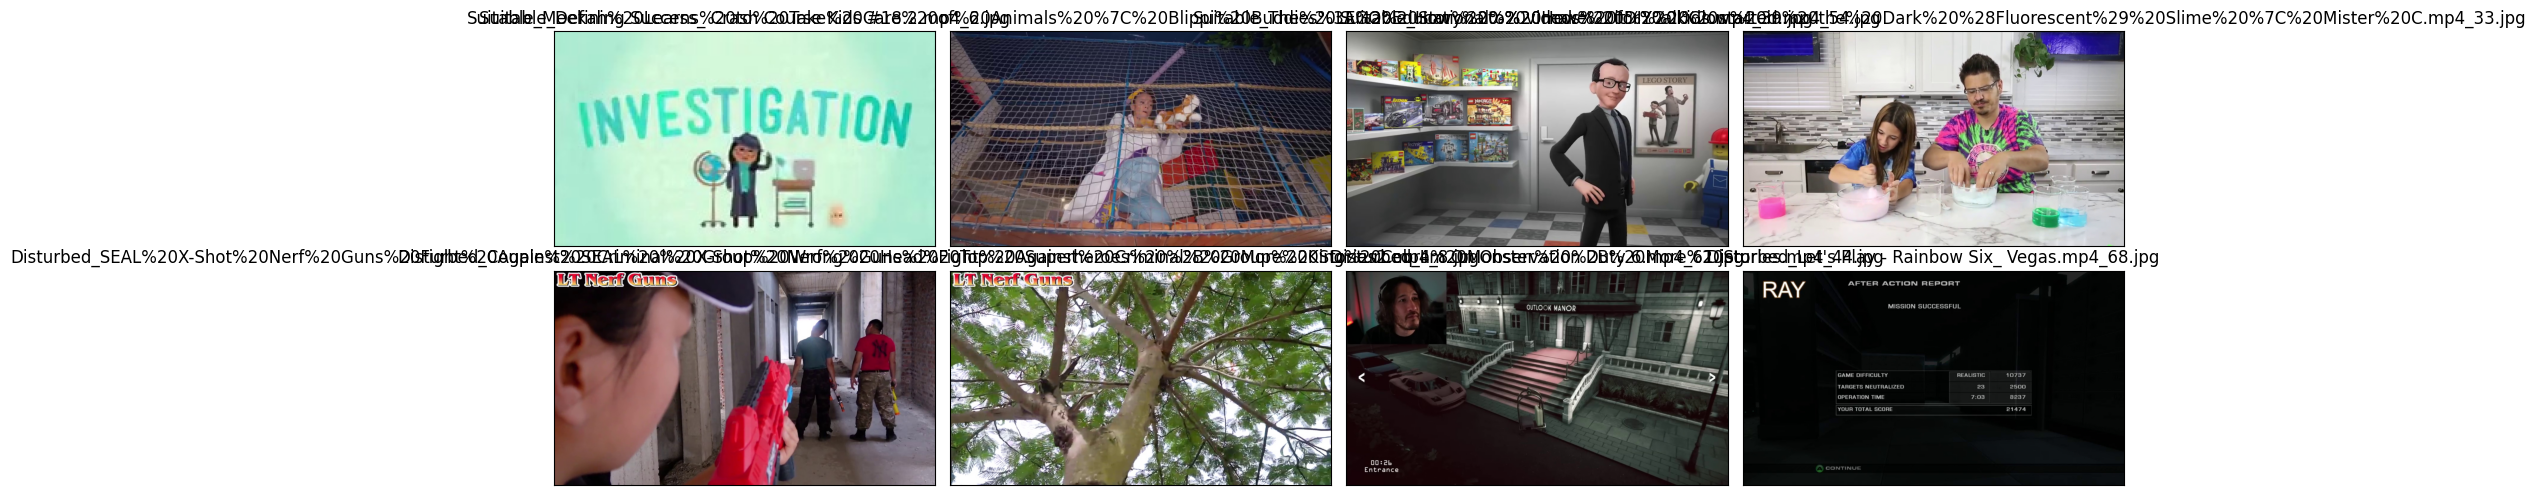

In [39]:
#Code by CLIP github -https://github.com/openai/CLIP
#Editted by A'nya

import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch
from google.colab import drive
import random

drive.mount("/content/drive")

original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))
descriptions = {}

transcripts_folder = '/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcripts'
frames_folder = '/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames'

all_frames = [filename for filename in os.listdir(frames_folder+"/Suitable/") if filename.endswith(".png") or filename.endswith(".jpg")]
selected_frames = random.sample(all_frames, 4)

for frame in selected_frames:
  name= os.path.splitext(frame)[0]
  image = Image.open(os.path.join('/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Suitable/', frame)).convert("RGB")
  descriptions[str(name)]= transcripts_folder + "/Suitable/" +"transcript_"+name[:-7]
#for filename in [filename for filename in os.listdir('/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Suitable/') if filename.endswith(".png") or filename.endswith(".jpg")][:4]:
   # selected_frames = random.sample(all_frames, 4)
    #for filename in selected_frames:
      #frame_path = os.path.join(frames_folder, filename)
      #name = os.path.splitext(filename)[0]
    #if name not in descriptions:
        #continue

    #image = Image.open(os.path.join('/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Suitable/', filename)).convert("RGB")


  plt.subplot(2, 4, len(images) + 1)
  plt.imshow(image)
  plt.title(f"{frame}") #\n{descriptions[name]}
  plt.xticks([])
  plt.yticks([])

  original_images.append(image)
  images.append(preprocess(image))
  #texts.append(descriptions[name])

plt.tight_layout()


all_frames = [filename for filename in os.listdir(frames_folder+"/Disturbed/") if filename.endswith(".png") or filename.endswith(".jpg")]
selected_frames = random.sample(all_frames, 4)
for frame in selected_frames:
  name= os.path.splitext(frame)[0]
  image = Image.open(os.path.join('/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Frames/Disturbed/', frame)).convert("RGB")
  descriptions[str(name)]= transcripts_folder + "/Disturbed/" +"transcript_"+name[:-7]
  plt.subplot(2, 4, len(images) + 1)
  plt.imshow(image)
  plt.title(f"{frame}") #\n{descriptions[name]}
  plt.xticks([])
  plt.yticks([])

  original_images.append(image)
  images.append(preprocess(image))
  #texts.append(descriptions[name])

plt.tight_layout()

In [40]:
#Code by A'nya
for key, value in descriptions.items():
    print(f'Frame:{key}:      Transcript:{value}')

Frame:Suitable_Defining Success_ Crash Course Kids #18.2.mp4_6:      Transcript:/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcripts/Suitable/transcript_Suitable_Defining Success_ Crash Course Kids #18.
Frame:Suitable_Meekah%20Learns%20to%20Take%20Care%20of%20Animals%20%7C%20Blippi%20Buddies%3A%20Educational%20videos%20for%20kids.mp4_39:      Transcript:/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcripts/Suitable/transcript_Suitable_Meekah%20Learns%20to%20Take%20Care%20of%20Animals%20%7C%20Blippi%20Buddies%3A%20Educational%20videos%20for%20kids
Frame:Suitable_The%20LEGO%20Story%20-%20How%20it%20all%20started.mp4_54:      Transcript:/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcripts/Suitable/transcript_Suitable_The%20LEGO%20Story%20-%20How%20it%20all%20started
Frame:Suitable_How%20to%20make%20DIY%20Glow%20in%20the%20Dark%20%28Fluorescent%29%20Slime%20%7C%20Mister%20C.mp4_33:      Transcript:/content/drive/MyDrive/CPS4802_FinalProject/Dataset/Transcrip